In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/2023 Capstone Project/Stage 1 - EDA'

/content/drive/MyDrive/2023 Capstone Project/Stage 1 - EDA


In [3]:
!pip install opencv-contrib-python

In [4]:
!pip install kaggle
import os
os.environ['KAGGLE_USERNAME'] = "saanvibajaj"
os.environ['KAGGLE_KEY'] = "eb87ca04224bff51d3b767ff0720b24b"
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('jessicali9530/celeba-dataset', path=".")
!unzip '/content/drive/MyDrive/2023 Capstone Project/Stage 1 - EDA/celeba-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [5]:
import pandas as pd
data_dir = '/content/drive/MyDrive/2023 Capstone Project/Stage 1 - EDA'
Image_Data_Path = data_dir + '/img_align_celeba/img_align_celeba'
attr_df = pd.read_csv(data_dir + '/list_attr_celeba.csv')

In [6]:
attr_df.head()

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1         -1                 1           -1                 1   
1             -1         -1                -1           -1                -1   
2             -1          1                -1           -1                -1   
3              1         -1                 1           -1                 1   
4             -1         -1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                -1               -1      1  
1                -1               -1      1  
2                -1               -1      1  
3                 1               -1      1  
4                -1               -1      1  

[5 rows x 41 columns]

In [7]:
attr_df.tail()

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
202594  202595.jpg                -1               -1           1   
202595  202596.jpg                -1               -1          -1   
202596  202597.jpg                -1               -1          -1   
202597  202598.jpg                -1                1           1   
202598  202599.jpg                -1                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
202594               -1    -1     -1         1        -1          -1  ...   
202595               -1    -1      1         1        -1          -1  ...   
202596               -1    -1     -1        -1        -1           1  ...   
202597               -1    -1     -1         1        -1           1  ...   
202598               -1    -1     -1        -1        -1          -1  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
202594         -1       -1             -1         -1                -1   
202595         -1        1              1         -1                -1   
202596         -1        1             -1         -1                -1   
202597         -1        1             -1          1                 1   
202598         -1       -1             -1          1                -1   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
202594           -1                 1                -1               -1   
202595           -1                -1                -1               -1   
202596           -1                -1                -1               -1   
202597           -1                 1                -1               -1   
202598           -1                 1                -1               -1   

        Young  
202594      1  
202595      1  
202596      1  
202597      1  
202598      1  

[5 rows x 41 columns]

In [8]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [9]:
listbbox_df = pd.read_csv(data_dir + '/list_bbox_celeba.csv')

In [10]:
listbbox_df.head()

image_id  x_1  y_1  width  height
0  000001.jpg   95   71    226     313
1  000002.jpg   72   94    221     306
2  000003.jpg  216   59     91     126
3  000004.jpg  622  257    564     781
4  000005.jpg  236  109    120     166

In [11]:
listbbox_df.tail()

image_id   x_1  y_1  width  height
202594  202595.jpg  1381   91    221     306
202595  202596.jpg   137  129    114     158
202596  202597.jpg    53   76     91     126
202597  202598.jpg   195   28     91     126
202598  202599.jpg   101  101    179     248

In [12]:
listbbox_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  202599 non-null  object
 1   x_1       202599 non-null  int64 
 2   y_1       202599 non-null  int64 
 3   width     202599 non-null  int64 
 4   height    202599 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ MB


In [13]:
evalpartition_df = pd.read_csv(data_dir + '/list_eval_partition.csv')

In [14]:
evalpartition_df.head()

image_id  partition
0  000001.jpg          0
1  000002.jpg          0
2  000003.jpg          0
3  000004.jpg          0
4  000005.jpg          0

In [15]:
evalpartition_df.tail()

image_id  partition
202594  202595.jpg          2
202595  202596.jpg          2
202596  202597.jpg          2
202597  202598.jpg          2
202598  202599.jpg          2

In [16]:
evalpartition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   image_id   202599 non-null  object
 1   partition  202599 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [17]:
landmarksalignceleba_df = pd.read_csv(data_dir + '/list_landmarks_align_celeba.csv')

In [18]:
landmarksalignceleba_df.head()

image_id  lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  nose_y  \
0  000001.jpg         69        109         106         113      77     142   
1  000002.jpg         69        110         107         112      81     135   
2  000003.jpg         76        112         104         106     108     128   
3  000004.jpg         72        113         108         108     101     138   
4  000005.jpg         66        114         112         112      86     119   

   leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  
0           73          152           108           154  
1           70          151           108           153  
2           74          156            98           158  
3           71          155           101           151  
4           71          147           104           150

In [19]:
landmarksalignceleba_df.tail()

image_id  lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  \
202594  202595.jpg         69        111         108         111      89   
202595  202596.jpg         67        112         110         112      85   
202596  202597.jpg         69        111         107         111      92   
202597  202598.jpg         69        111         108         111      90   
202598  202599.jpg         68        111         109         112      81   

        nose_y  leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  
202594     140           73          151           104           153  
202595     141           66          150           110           150  
202596     137           68          151           109           153  
202597     137           71          153           106           151  
202598     136           75          150           103           152

In [20]:
landmarksalignceleba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   image_id      202599 non-null  object
 1   lefteye_x     202599 non-null  int64 
 2   lefteye_y     202599 non-null  int64 
 3   righteye_x    202599 non-null  int64 
 4   righteye_y    202599 non-null  int64 
 5   nose_x        202599 non-null  int64 
 6   nose_y        202599 non-null  int64 
 7   leftmouth_x   202599 non-null  int64 
 8   leftmouth_y   202599 non-null  int64 
 9   rightmouth_x  202599 non-null  int64 
 10  rightmouth_y  202599 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 17.0+ MB


In [21]:
attrdrlabels_df = attr_df[['image_id', 'Male']].groupby(['Male']).count().reset_index()
attrdrlabels_df.columns = ['image_id','count']
attrdrlabels_df = attrdrlabels_df.sort_values(by =['count'],ascending = False)
print(attrdrlabels_df)

   image_id   count
0        -1  118165
1         1   84434


In [22]:
print('Number of unique labels: ', attrdrlabels_df.shape[0])

Number of unique labels:  2


Text(0.5, 1.0, 'Number of images classified as Male or Female')

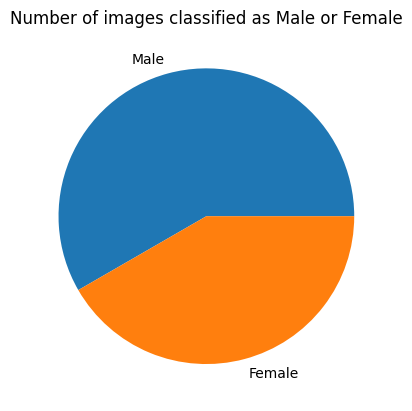

In [23]:
import matplotlib.pyplot as plt

attrdr_labels = ['Male', 'Female']
plt.pie(attrdrlabels_df['count'][:100], labels=attrdr_labels)
plt.title("Number of images classified as Male or Female")

In [24]:
evalpartitionlabels_df = evalpartition_df[['image_id', 'partition']].groupby(['partition']).count().reset_index()
evalpartitionlabels_df.columns = ['image_id','count']
evalpartitionlabels_df =evalpartitionlabels_df.sort_values(by =['count'],ascending = False)
print(evalpartitionlabels_df)

   image_id   count
0         0  162770
2         2   19962
1         1   19867


In [25]:
print('Number of unique labels: ', evalpartitionlabels_df.shape[0])

Number of unique labels:  3


Text(0.5, 1.0, 'Number of images in the same label for each label/class (Evaluation Partition)')

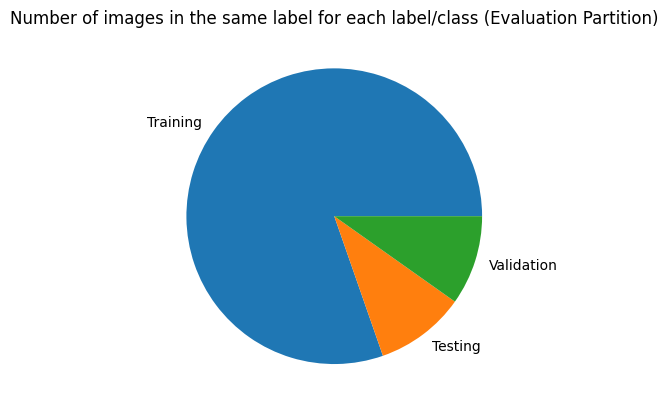

In [26]:
import matplotlib.pyplot as plt

evalpart_labels = ['Training', 'Testing', 'Validation']
plt.pie(evalpartitionlabels_df['count'][:100], labels=evalpart_labels)
plt.title("Number of images in the same label for each label/class (Evaluation Partition)")

In [27]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

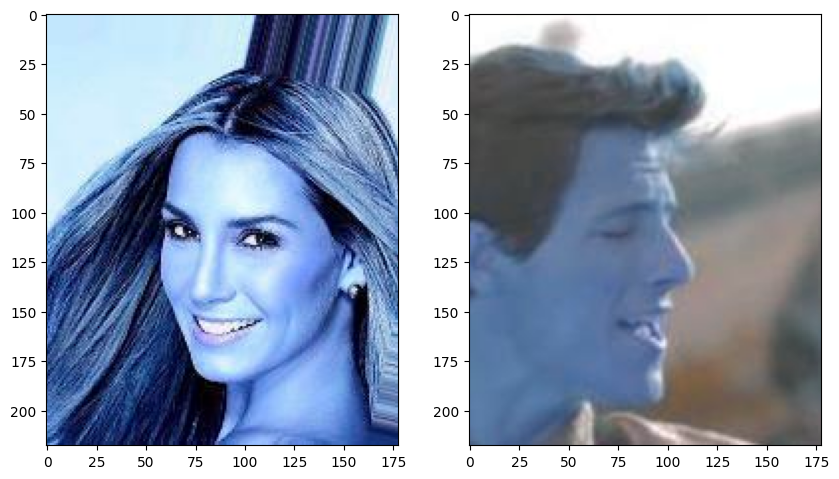

In [29]:
img_path_1 = '/content/drive/MyDrive/2023 Capstone Project/Stage 1 - EDA/img_align_celeba/img_align_celeba/000001.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/2023 Capstone Project/Stage 1 - EDA/img_align_celeba/img_align_celeba/000003.jpg'
img_2 = cv2.imread(img_path_2)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img_1)
plt.subplot(122)
plt.imshow(img_2)

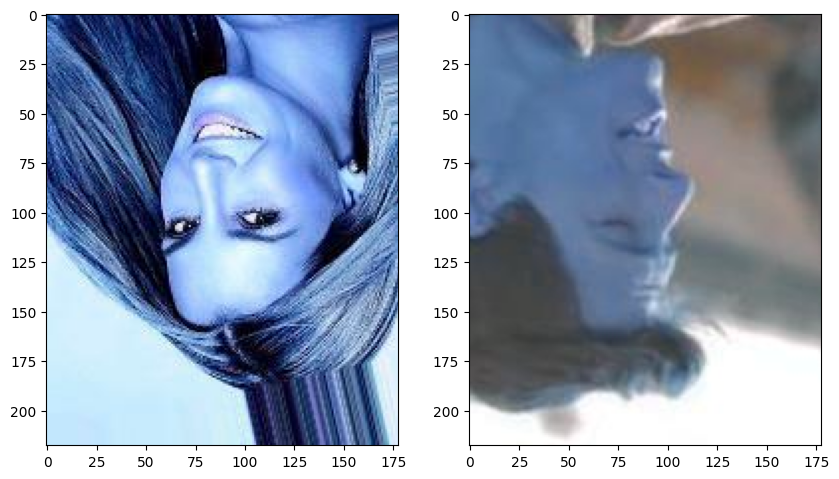

In [30]:
flip_img_1=cv2.flip(img_1,0) # vertical flip
flip_img_2=cv2.flip(img_2,0) # vertical flip

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(flip_img_1)
plt.subplot(122)
plt.imshow(flip_img_2)

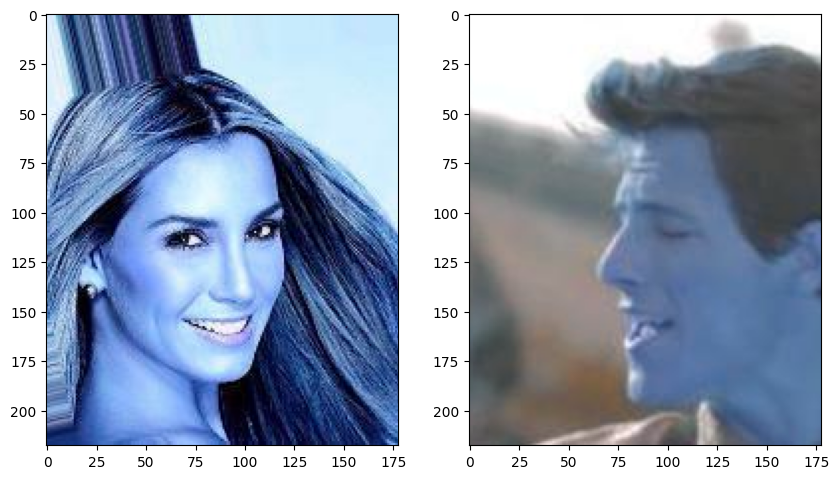

In [31]:
flip_img_1=cv2.flip(img_1,1) # horizontal flip
flip_img_2=cv2.flip(img_2,1) # horizontal flip

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(flip_img_1)
plt.subplot(122)
plt.imshow(flip_img_2)

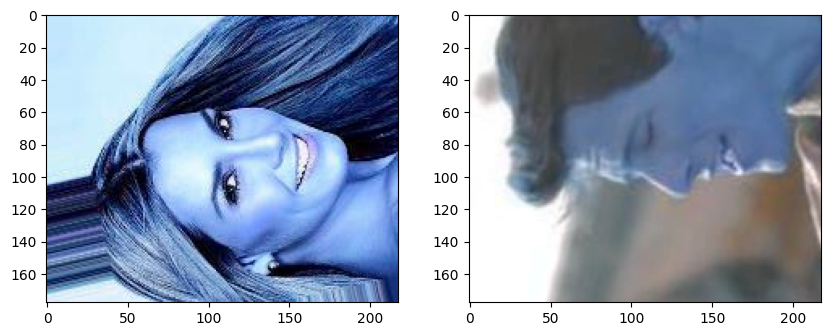

In [32]:
transp_img_1=cv2.transpose(img_1,1) # transpose
transp_img_2=cv2.transpose(img_2,1) # transpose

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(transp_img_1)
plt.subplot(122)
plt.imshow(transp_img_2)

In [33]:
print("Female racing image min/max values and co-ordinates")

for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(img_1[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))

print("Male racing image min/max values and co-ordinates")

for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(img_2[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))

Female racing image min/max values and co-ordinates
min 0.0 is at (108, 0), and max 255.0 is at (88, 158)
min 0.0 is at (111, 0), and max 255.0 is at (62, 49)
min 0.0 is at (144, 97), and max 255.0 is at (30, 0)
Male racing image min/max values and co-ordinates
min 40.0 is at (0, 103), and max 255.0 is at (0, 0)
min 55.0 is at (70, 52), and max 255.0 is at (0, 0)
min 59.0 is at (30, 52), and max 255.0 is at (0, 0)


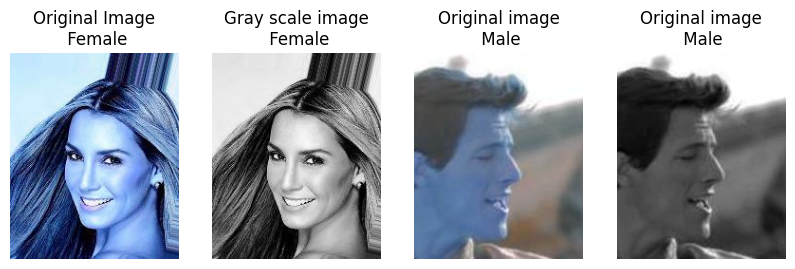

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline


fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\n Female')
ax1.set_axis_off()

ax2.imshow(skic.rgb2gray(img_1), cmap ='gray')
ax2.set_title('Gray scale image\n Female')
ax2.set_axis_off()

ax3.imshow(img_2)
ax3.set_title('Original image\n Male')
ax3.set_axis_off()


ax4.imshow(skic.rgb2gray(img_2),cmap = 'gray')
ax4.set_title('Original image\n Male')
ax4.set_axis_off()

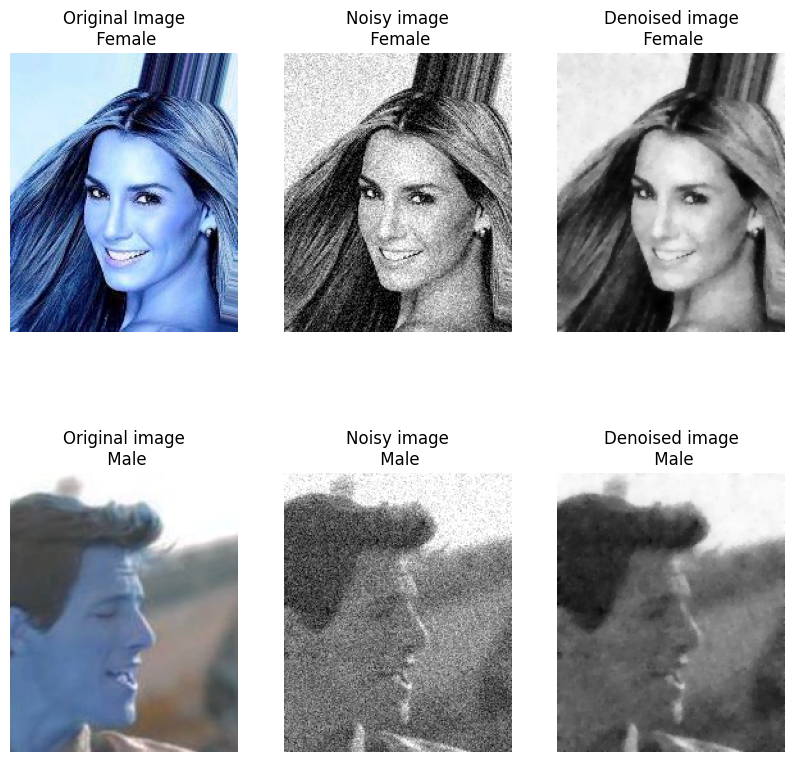

In [35]:
# We add Gaussian noise and denoise using denoise_tv_bregman approach
#for img_1 and img_2
img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)

img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)


fig, ((ax1, ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(ncols=3,nrows=2,figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\n Female')
ax1.set_axis_off()

ax2.imshow(img_1_n, cmap ='gray')
ax2.set_title('Noisy image\n Female')
ax2.set_axis_off()

ax3.imshow(img_1_d, cmap = 'gray')
ax3.set_title('Denoised image\n Female')
ax3.set_axis_off()

ax4.imshow(img_2)
ax4.set_title('Original image\n Male')
ax4.set_axis_off()

ax5.imshow(img_2_n, cmap ='gray')
ax5.set_title('Noisy image\n Male')
ax5.set_axis_off()

ax6.imshow(img_2_d, cmap = 'gray')
ax6.set_title('Denoised image\n Male')
ax6.set_axis_off()

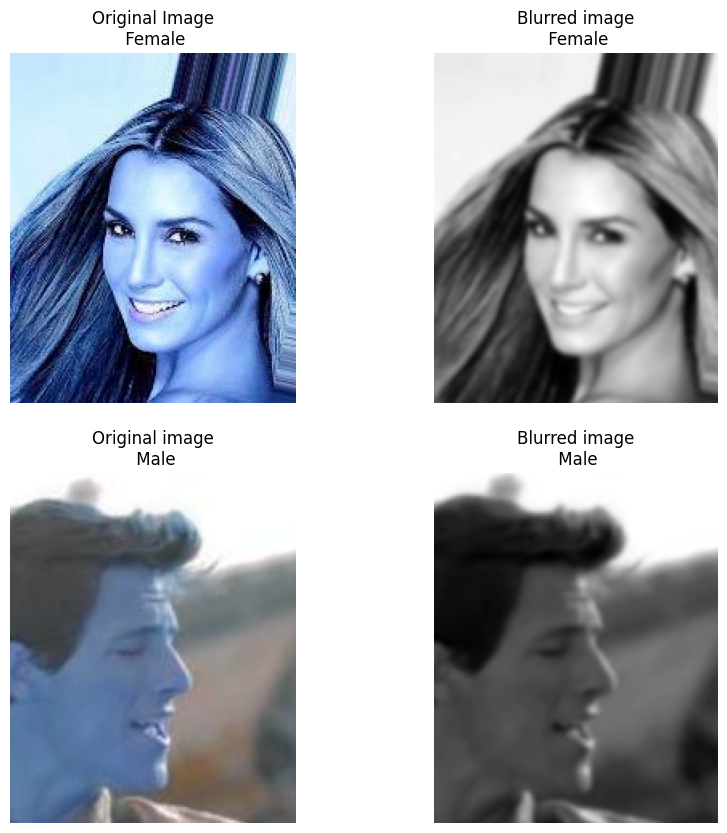

In [36]:
d=3
img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\n Female')
ax1.set_axis_off()

ax2.imshow(img_1_blur3, cmap ='gray')
ax2.set_title('Blurred image\n Female')
ax2.set_axis_off()

ax3.imshow(img_2)
ax3.set_title('Original image\n Male')
ax3.set_axis_off()

ax4.imshow(img_2_blur3, cmap = 'gray')
ax4.set_title('Blurred image\n Male')
ax4.set_axis_off()

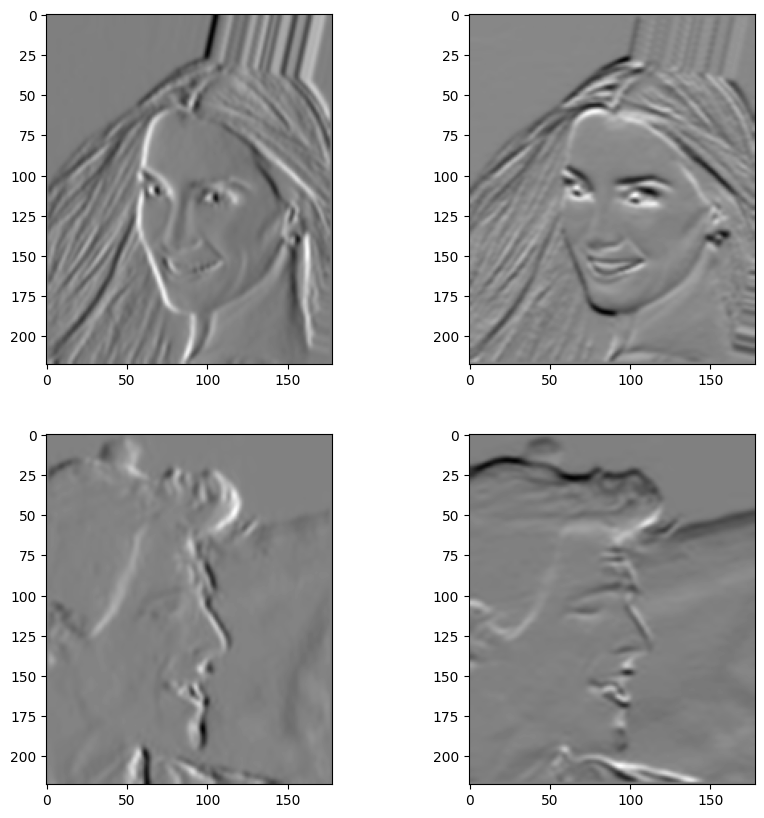

In [37]:
sobel_img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)

sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(sobelx_img_1, cmap = 'gray')
plt.subplot(222)
plt.imshow(sobely_img_1, cmap = 'gray')
plt.subplot(223)
plt.imshow(sobelx_img_2, cmap = 'gray')
plt.subplot(224)
plt.imshow(sobely_img_2, cmap = 'gray')

In [38]:
import skimage.exposure as skie
%matplotlib inline

In [39]:
def show(img):
    # Display the image.
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(12, 3))

    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()

    # Display the histogram.
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])

    plt.show()

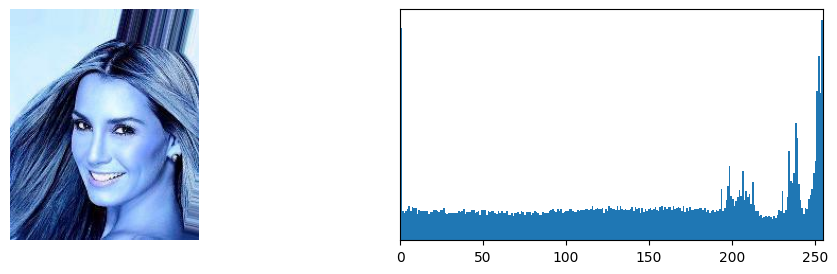

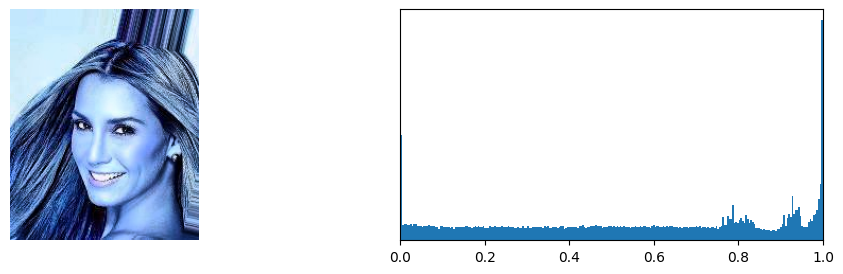

In [40]:
show(img_1)
show(skie.equalize_adapthist(img_1))

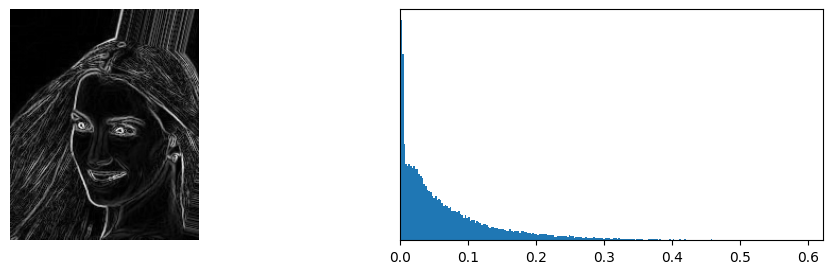

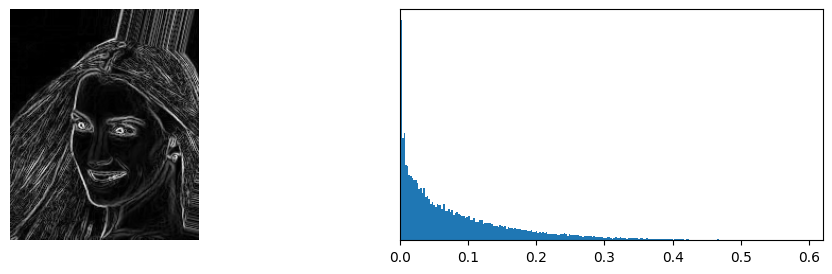

In [41]:
img = skic.rgb2gray(img_1)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_1))
sobimg_heq = skif.sobel(img)
show(sobimg_heq)

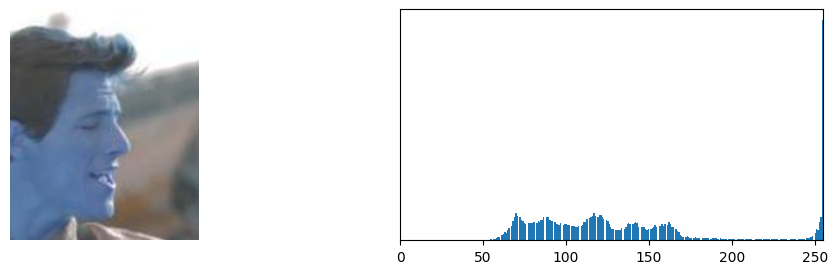

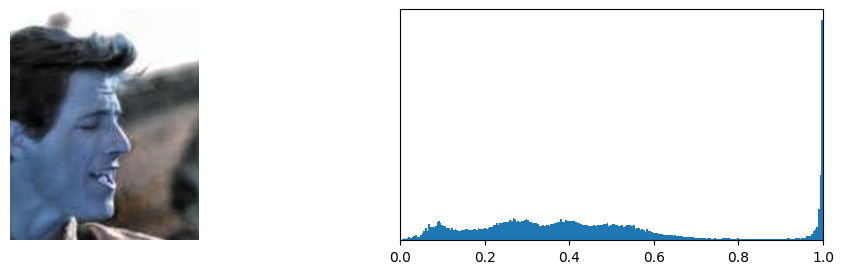

In [42]:
show(img_2)
show(skie.equalize_adapthist(img_2))

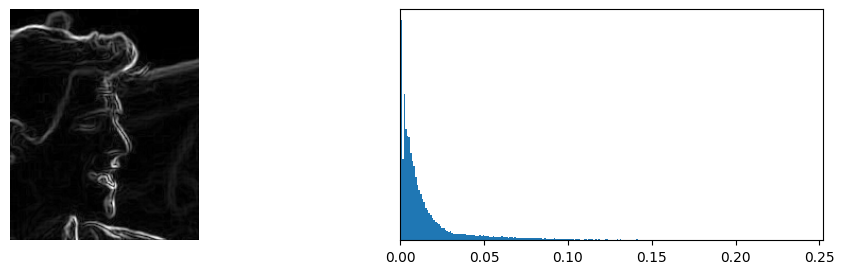

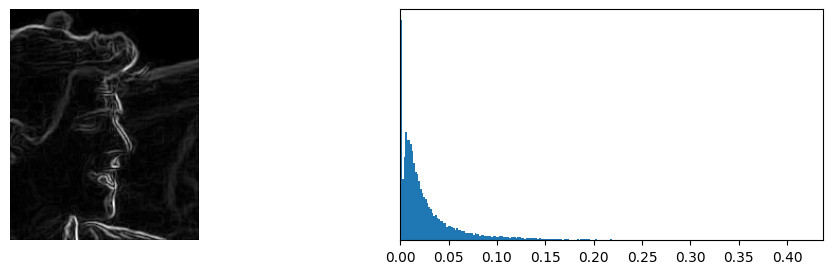

In [43]:
img = skic.rgb2gray(img_2)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_2))
sobimg_heq = skif.sobel(img)
show(sobimg_heq)